**Linear regression** is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

When there is only one independent feature, it is known as **Simple Linear Regression**,

y=β +β1X


*  Y is the dependent variable
*  X is the independent variable
*  β is the intercept
*  β1 is the slope

and when there are more than one feature, it is known as **Multiple Linear Regression**.
y=β +β1X1+β2X2+………βnXn
where:

*  Y is the dependent variable
* X1, X2, …, Xn are the independent variables
* β is the intercept
* β1, β2, …, βn are the slopes

**The goal of the algorithm is to find the best Fit Line equation that can predict the values based on the independent variables.**

# **Load The Data**

In [53]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/User/Downloads/data_for_LR.csv')
d = df.to_numpy()
d
df.isnull().sum()
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,NaN
697,82.0,88.603770
698,66.0,63.648685


# **Data Preprocessing**

# **Handling Missing Values:**

In [47]:
def handle_missing_values(df):
    df.fillna(df.mean(),inplace=True)
df.mean()
handle_missing_values(df)
df.isnull().sum()

x    0
y    0
dtype: int64

# **Test case**
x: [24, 50, 15, 38, None, 36, 12, 81, 25, None]

y: [21.54945, 47.46446, 17.21866, 36.5864, 87.28898, None, 10.7809, 80.7634, 24.61215, None]



In [143]:
x= [24, 50, 15, 38, None, 36, 12, 81, 25, None]

y= pd.DataFrame([21.54945, 47.46446, 17.21866, 36.5864, 87.28898, None, 10.7809, 80.7634, 24.61215, None])
handle_missing_values(y)
y

,0
0,21.54945
1,47.46446
2,17.21866
3,36.58640
4,87.28898
5,40.78305
6,10.78090
7,80.76340
8,24.61215
9,40.78305


# **Removing Duplicates:**

In [5]:
def remove_duplicates(df):
    return df.drop_duplicates()

# **Test Case**
x: [24, 24, 15, 38, 87, 36, 12, 12, 25, 5]

y: [21.54945, 21.54945, 17.21866, 36.5864, 87.28898, 32.46387, 10.7809, 10.7809, 24.61215, 6.963319]


In [82]:
cleaned_data_duplicates = remove_duplicates(test_data)

NameError: name 'test_data' is not defined

# **Handle Outliers**


In [7]:
def handle_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    maxoutliers = df[df[column] > upper_bound].index
    minoutliers = df[df[column] < lower_bound].index
    df.loc[maxoutliers, column] = max(df[column])
    df.loc[minoutliers, column] = min(df[column])
    # print(f"IQR: {IQR}")
    # print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    # print(f"Number of upper outliers: {len(maxoutliers), df['x'][maxoutliers[0]]} ")
    # print(f"Number of lower outliers: {len(minoutliers)}")
    
    return df


# **Test Case**
x: [24, 50, 15, 38, 87, 36, 12, 81, 25, 5, 100, 150]

y: [21.54945, 47.46446, 17.21866, 36.5864, 87.28898, 32.46387, 10.7809, 80.7634, 24.61215, 6.963319, 200, 300]
})

In [90]:
cleaned_data_outliers = handle_outliers(test_data, 'y')

NameError: name 'test_data' is not defined

# **Standardizing the Data**

In [9]:
def standardize_data(df, columns):
    x = df[columns]
    y = (x - np.mean(x))/ np.std(x)
    df[columns] = y
    return df


# **Test Case**
x: [24, 50, 15, 38, 87, 36, 12, 81, 25, 5]

y: [21.5, 47.4, 17.2, 36.5, 87.2, 32.4, 10.7, 80.7, 24.6, 6.9]


In [49]:
handle_missing_values(df)
print(df)
df = remove_duplicates(df)
print(df)
df = handle_outliers(df, 'x')
print(df)

df = standardize_data(df, 'x') 
print(df)

df = handle_outliers(df, 'y')
df = standardize_data(df, 'y') 
data = df.to_numpy()
data

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  49.946273
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]
        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  49.946273
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]
        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  49.946273
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]
            x          y
0   -0.229364  21.549452
1   -0.036299  47.464463
2   -0.296194  17.218656
3   -0.125406  36.586398
4    0.238448  87.288984
..        ...        .

array([[-2.29364017e-01,  2.15494520e+01],
       [-3.62988556e-02,  4.74644630e+01],
       [-2.96194265e-01,  1.72186563e+01],
       ...,
       [ 2.01319805e-01,  8.86037700e+01],
       [ 8.25104745e-02,  6.36486853e+01],
       [ 3.12703552e-01,  9.49752655e+01]])

# **Visualize the Data**

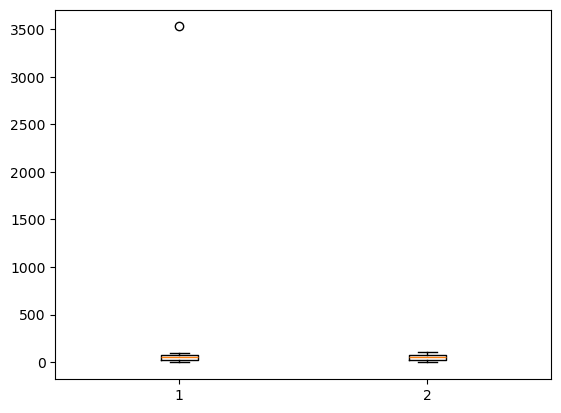

array([[24.        , 21.54945196],
       [50.        , 47.46446305],
       [15.        , 17.21865634],
       ...,
       [82.        , 88.60376995],
       [66.        , 63.64868529],
       [97.        , 94.9752655 ]])

In [99]:
# OUTLIER SHOWED BOXPLOT
plt.boxplot(d)
plt.show()
d

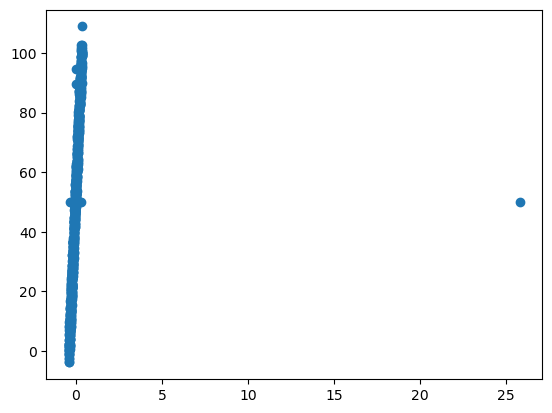

In [51]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.show()

# **Split The Data**
Split the data into an 80-20 train-test split.

In [174]:
import random
def split_data(data):
    np.random.shuffle(data)
    train = int(len(data) * 0.8)
    x = data[:,0]
    y = data[:,-1]
    return( x[:train], y[0:train], x[train:], y[train:])

Xtrain, Ytrain, Xtest, Ytest = split_data(data)
# len(Xtrain)

# **Plot the train and test data**

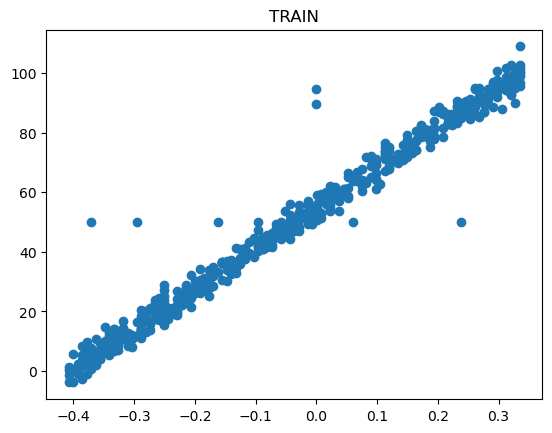

In [177]:
import matplotlib.pyplot as plt
plt.title("TRAIN")
plt.scatter(Xtrain, Ytrain)
plt.show()

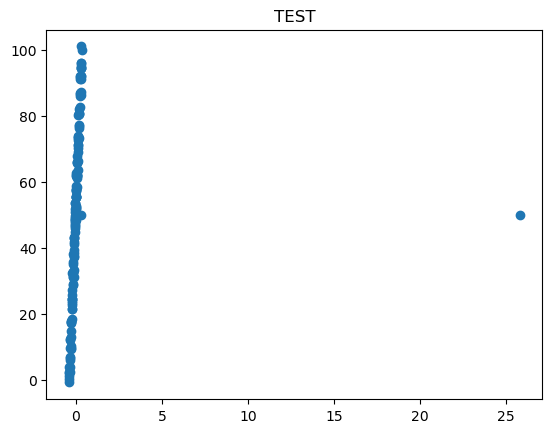

In [179]:
import matplotlib.pyplot as plt
plt.title("TEST")
plt.scatter(Xtest, Ytest)
plt.show()

# **Initialize Weights**

In [181]:
def initialize_weights(X):
    X = np.hstack((X.reshape(-1,1), np.ones((X.shape[0],1))))
    # print(X.shape, np.ones((X.shape[0], 1)).shape)
    thetas = np.ones((X.shape[1]))
    # result = np.dot(X, thetas.reshape(-1,1))
    # print(result)
    return X, thetas
                    


# Xtrain, theta = initialize_weights(Xtrain)

# **Mean Squared Error (MSE) Cost Function**

In [184]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))


# **Test case:**
y_true = np.array([3, -0.5, 2, 7])

y_pred = np.array([2.5, 0.0, 2, 8])

MSE: 0.3755

In [187]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
mean_squared_error(y_true, y_pred)

0.375

# **Gradient Descent**

In [190]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    dt = derivative_of_cost(X, y, theta)
    gd = theta - (learning_rate * dt)
    return gd


In [192]:
def hypothesis(X, thetas):
    # X = np.hstack((X.reshape(-1,1), np.ones((X.shape[0],1))))
    # print(X.shape, np.ones((X.shape[0], 1)).shape)
    result = np.dot(X, thetas)
    # print(len(result))
    return result
                    
def derivative_of_cost(X, y, theta):
    yprd = hypothesis(X, theta)
    # f1 = np.dot((y-yprd).reshape(-1,1) , X)
    # f2 = f1 / float(X.shape[0])
    error = yprd - y
    grads = (2 / X.shape[0]) * np.dot(X.T, error)
    # print(len(grads))
    return grads

# **Training the Model**

In [202]:
def train_model(X, y, learning_rate=0.01, iterations=1000):
    X, theta = initialize_weights(X)
    print('Weights initialized successfully.')
    for i in range(iterations):
        theta = gradient_descent(X, y,theta, learning_rate, iterations)
        
        if i%100 == 0:
            print(f'Loss {i}: ', mean_squared_error(y, hypothesis(X, theta)))
    return theta
        
theta = train_model(Xtrain, Ytrain, learning_rate=0.01, iterations=1000)
theta

Weights initialized successfully.
Loss 0:  3152.640156506563
Loss 100:  765.3503231860109
Loss 200:  605.4271427347758
Loss 300:  504.71962964529325
Loss 400:  421.84434187104074
Loss 500:  353.1962228829215
Loss 600:  296.32502387309165
Loss 700:  249.2102190028296
Loss 800:  210.17807244114655
Loss 900:  177.8419846362386


array([81.05613119, 52.88685682])

# **Prediction and Evaluation of Model**

In [200]:
def predict(X, theta):
    if np.isscalar(X):
        X = np.array([[X]])  
    elif X.ndim == 1:
        X = X.reshape(1, -1) 
    
    X = np.hstack((X, np.ones((X.shape[0], 1)))) 

    predictions = np.dot(X, theta)
    return predictions

ypred = []
for i in Xtest:
    # print(theta)
    ypred.append( predict(i, theta))
# print(len(Ytest), len(pred))
print(Ytest.shape, np.array(ypred).shape)
mean_squared_error(Ytest, ypred)
    

(140,) (140, 1)


32352.805531955113

# **Learning rate experiments**
 lr_values = [1.0, 0.5, 0.2, 0.25, 0.1]

In [205]:
lr_values  = [1.0, 0.5, 0.2, 0.25, 0.1]
thetas = []
for lr in lr_values:
    print("Learnind rate: ", lr)
    theta = train_model(Xtrain, Ytrain, learning_rate=lr, iterations=1000)
    thetas.append(theta)

thetas
    

Learnind rate:  1.0
Weights initialized successfully.
Loss 0:  3109.868160825671
Loss 100:  4320.583234523171
Loss 200:  7755.271087206824
Loss 300:  13934.170519355424
Loss 400:  25049.823472311942
Loss 500:  45046.54650161238
Loss 600:  81020.0456386255
Loss 700:  145735.28114320047
Loss 800:  262156.0299411085
Loss 900:  471593.4312731097
Learnind rate:  0.5
Weights initialized successfully.
Loss 0:  794.635604004419
Loss 100:  21.73765620429765
Loss 200:  21.68705970240868
Loss 300:  21.687056390169307
Loss 400:  21.68705638995248
Loss 500:  21.68705638995246
Loss 600:  21.687056389952463
Loss 700:  21.687056389952463
Loss 800:  21.687056389952463
Loss 900:  21.687056389952463
Learnind rate:  0.2
Weights initialized successfully.
Loss 0:  1694.6401432261866
Loss 100:  40.05238694893218
Loss 200:  22.098684240442207
Loss 300:  21.696282332646753
Loss 400:  21.68726317386783
Loss 500:  21.687061024664505
Loss 600:  21.6870564938317
Loss 700:  21.68705639228074
Loss 800:  21.687056390

[array([ 169.52999003, -862.02656052]),
 array([133.51327993,  54.94725806]),
 array([133.51327917,  54.94725803]),
 array([133.51327992,  54.94725806]),
 array([133.50270391,  54.94684265])]

# **Plot the Best Fit Line**

(2,) (559,)


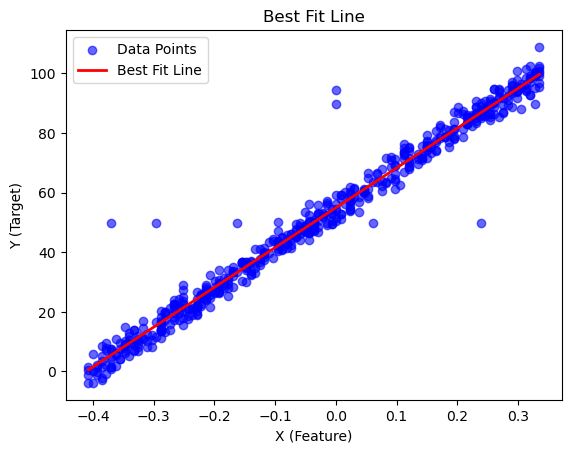

In [210]:
import matplotlib.pyplot as plt
import numpy as np

def plot_best_fit_line(X, Y, theta):
    if X.ndim > 1:
        X = X.flatten()
    
    X_sorted = np.sort(X) 
    print(theta.shape, X_sorted.shape)
    Y_pred = []
    for x in X_sorted:
        Y_pred.append(predict(x, theta))
    
    plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.6)
    
    plt.plot(X_sorted, Y_pred, color='red', label='Best Fit Line', linewidth=2)
    
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.title("Best Fit Line")
    plt.legend()
    plt.show()


df = pd.read_csv('C:/Users/User/Downloads/data_for_LR.csv')
d = df.to_numpy()

# plot_best_fit_line(data[:,0], data[:,1], theta)

plot_best_fit_line(Xtrain, Ytrain, theta)

# plot_best_fit_line(Xtest, Ytest, theta)


# **Test case:**

loss:  84606.52598764215
(2,) (5,)


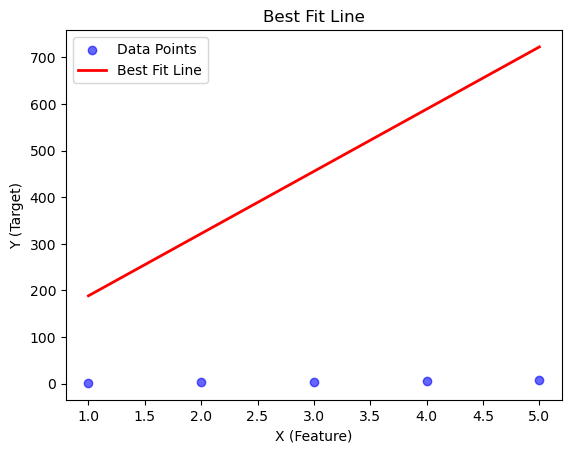

In [252]:
def test_best_fit_line():
    data = {
            'X': [1, 2, 3, 4, 5],
            'y': [1.5, 3.1, 4.5, 6.2, 8.1],
            'ypred': [1.7, 3.2, 4.7, 6.2, 7.7]
        }
        
    t = pd.DataFrame(data)
    for i in [1, 2, 3, 4, 5]:
        pred = np.dot(i, theta)
        ypred.append(predict(i, theta))
    print("loss: ",mean_squared_error(np.array([1.5, 3.1, 4.5, 6.2, 8.1]), ypred))
test_best_fit_line()
a = np.array([1, 2, 3, 4, 5])
b = np.array([1.5, 3.1, 4.5, 6.2, 8.1])
plot_best_fit_line(a, b, theta)